In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn import metrics
import os


In [2]:
df = pd.read_csv("bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# rename y to subscription
df.rename(columns={'y': 'subscription'}, inplace=True)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscription'],
      dtype='object')

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscription      0
dtype: int64

In [10]:
# check duplicate
duplicateRows = df[df.duplicated()]
duplicateRows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [11]:

df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [12]:
obj_columns = []
for i, x in enumerate(df.dtypes.tolist()):
    if x == 'object':
        obj_columns.append(df.columns[i])

for x in obj_columns:
    print(f'Number of Unique Values in {x} column: ', df[x].nunique())

Number of Unique Values in job column:  12
Number of Unique Values in marital column:  4
Number of Unique Values in education column:  8
Number of Unique Values in default column:  3
Number of Unique Values in housing column:  3
Number of Unique Values in loan column:  3
Number of Unique Values in contact column:  2
Number of Unique Values in month column:  10
Number of Unique Values in day_of_week column:  5
Number of Unique Values in poutcome column:  3
Number of Unique Values in subscription column:  2


In [13]:
# unique values in dependent variable
print(df['subscription'].nunique())
print(df['subscription'].value_counts())


2
no     36548
yes     4640
Name: subscription, dtype: int64


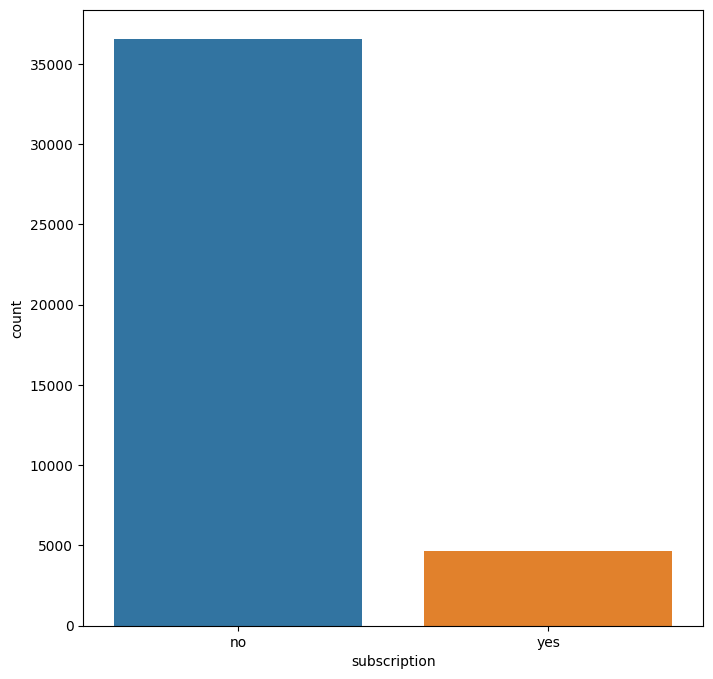

In [14]:
fig = plt.gcf() 
fig.set_size_inches(8, 8)
sns.countplot(x ='subscription', data = df)
# Show the plot
plt.show()

**Preliminary analysis of dependent variable subsription**

Binary encode to yes-1, no-0

The current data set is very unbalanced; more data fall into the "no" category than the "yes" category.

Count of no- 36548, yes-4640

In [15]:
# unique values in job variable
print(df.job.nunique())
print(df.job.unique())

12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


<AxesSubplot: xlabel='job', ylabel='count'>

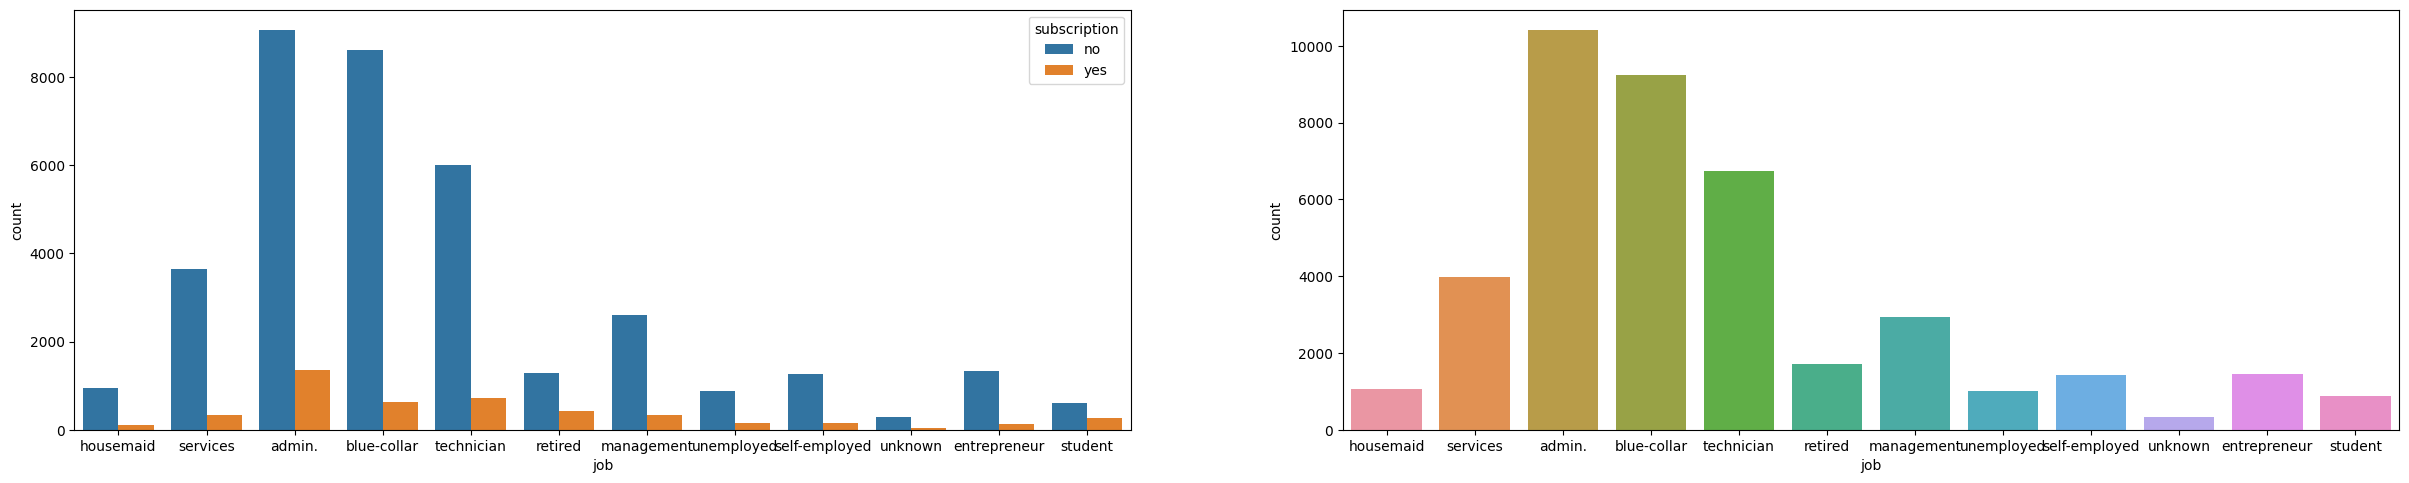

In [16]:


plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='job',hue = 'subscription', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='job', data = df)

Insights:

**technical** -

-  need to encode the variables
-  unknown profession needs to be handled

**business** 

-  The clients of differnt professions reached through the campaign is not uniform.
-  more the 10k clients reached to where of the admin profession
-  people of house maind, retired, unemployed,self employed and student where contacted the least < 2000
-  min age - 17
-  mean age - 38
-  max age - 98
-  maximum subscription was achieved from admin profession, follwed by techician and retired

In [17]:
print(df.marital.nunique())
print(df.marital.unique())

4
['married' 'single' 'divorced' 'unknown']


<AxesSubplot: xlabel='marital', ylabel='count'>

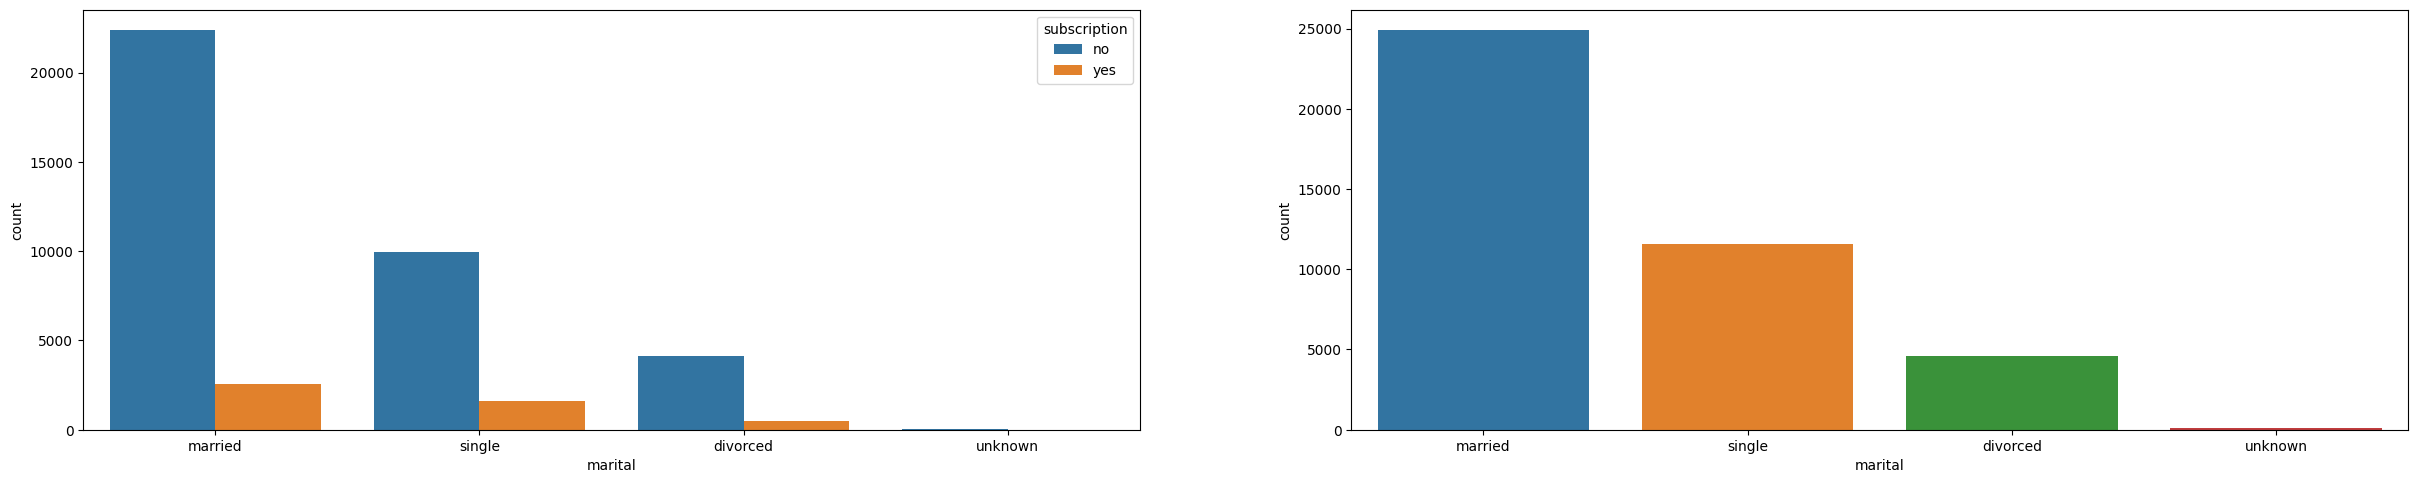

In [18]:
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='marital',hue = 'subscription', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='marital', data = df)

In [19]:
# unique values in education variable
print(df.education.nunique())
print(df.education.unique())

8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


<AxesSubplot: xlabel='education', ylabel='count'>

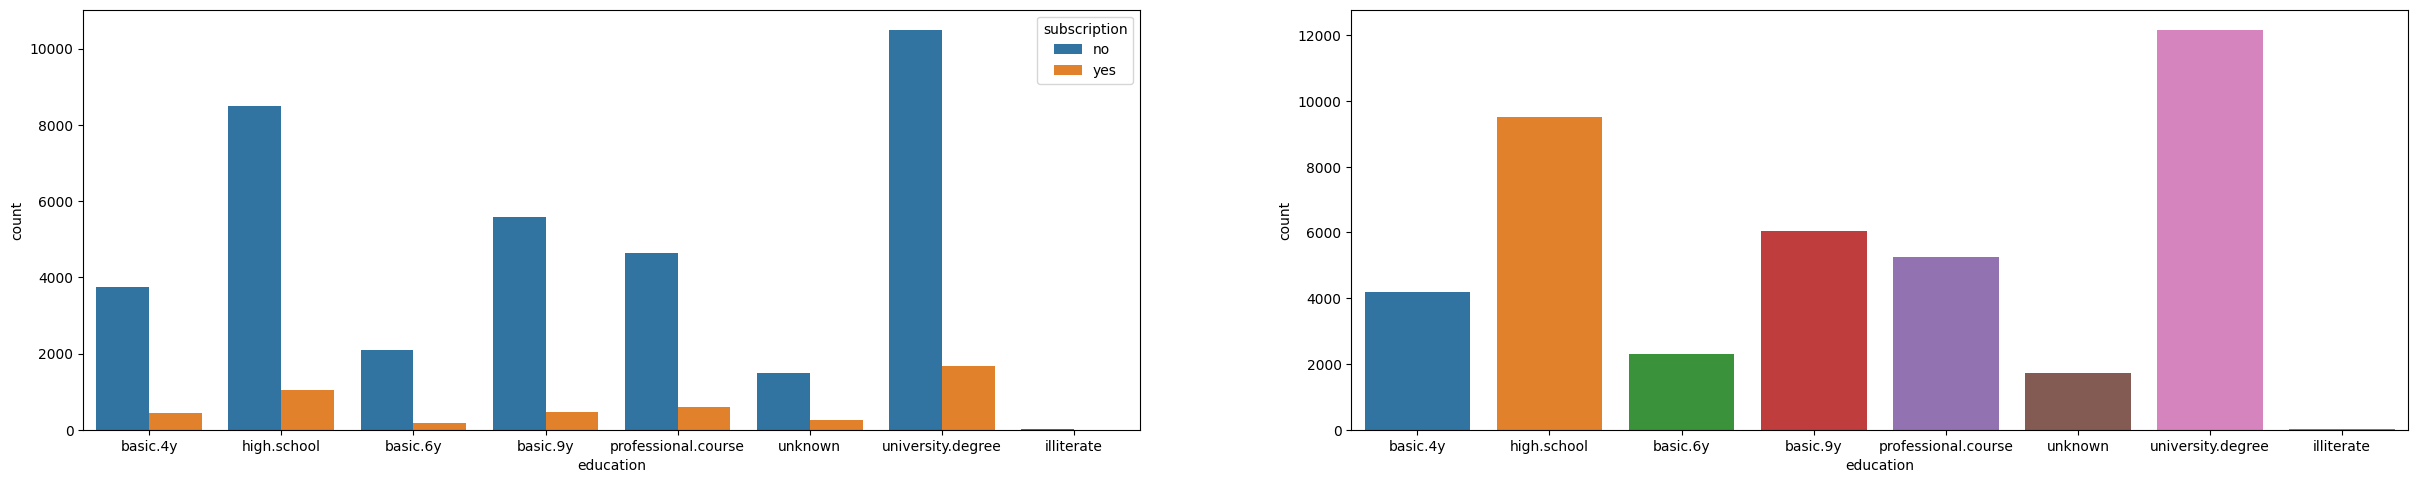

In [20]:
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='education',hue = 'subscription', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='education', data = df)

In [21]:

# unique values in day_of_week  variable
print(df.day_of_week .nunique())
print(df.day_of_week .unique())

5
['mon' 'tue' 'wed' 'thu' 'fri']


<AxesSubplot: xlabel='day_of_week', ylabel='count'>

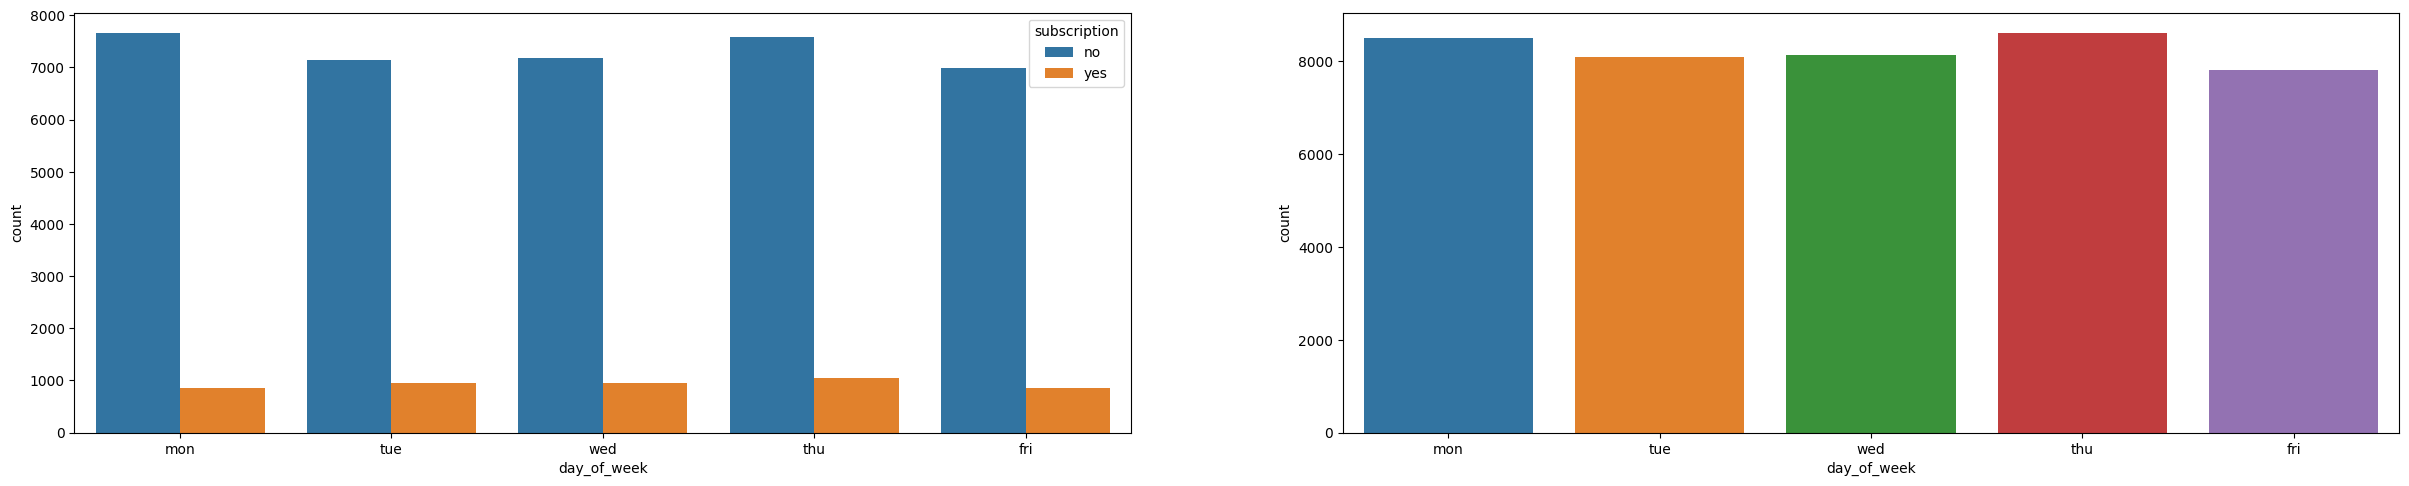

In [22]:
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='day_of_week',hue = 'subscription', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='day_of_week', data = df)

3
['no' 'unknown' 'yes']


<AxesSubplot: xlabel='default', ylabel='count'>

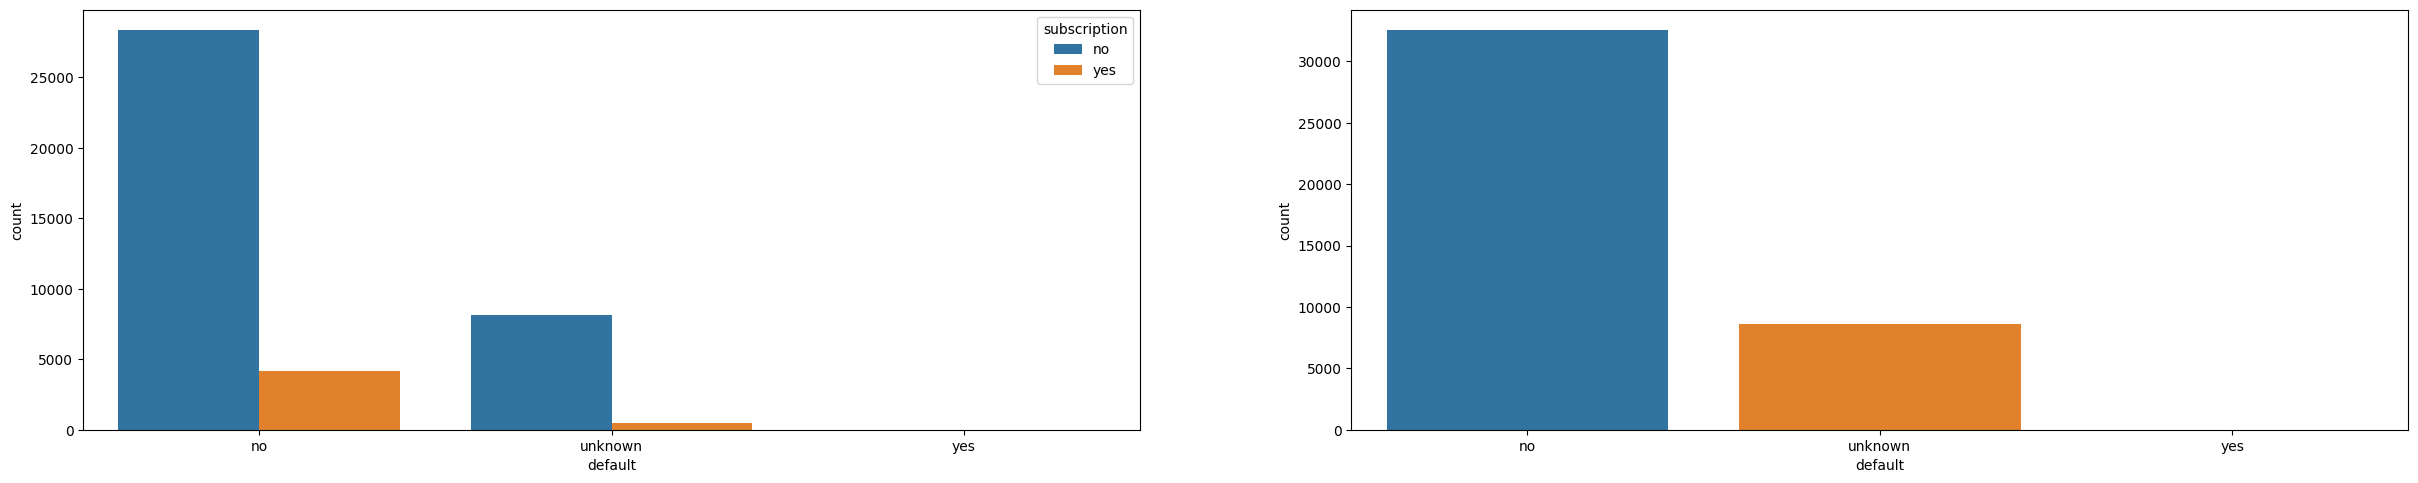

In [23]:
# unique values in default  variable
print(df.default.nunique())
print(df.default.unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='default',hue = 'subscription', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='default', data = df)

3
['no' 'yes' 'unknown']


<AxesSubplot: xlabel='loan', ylabel='count'>

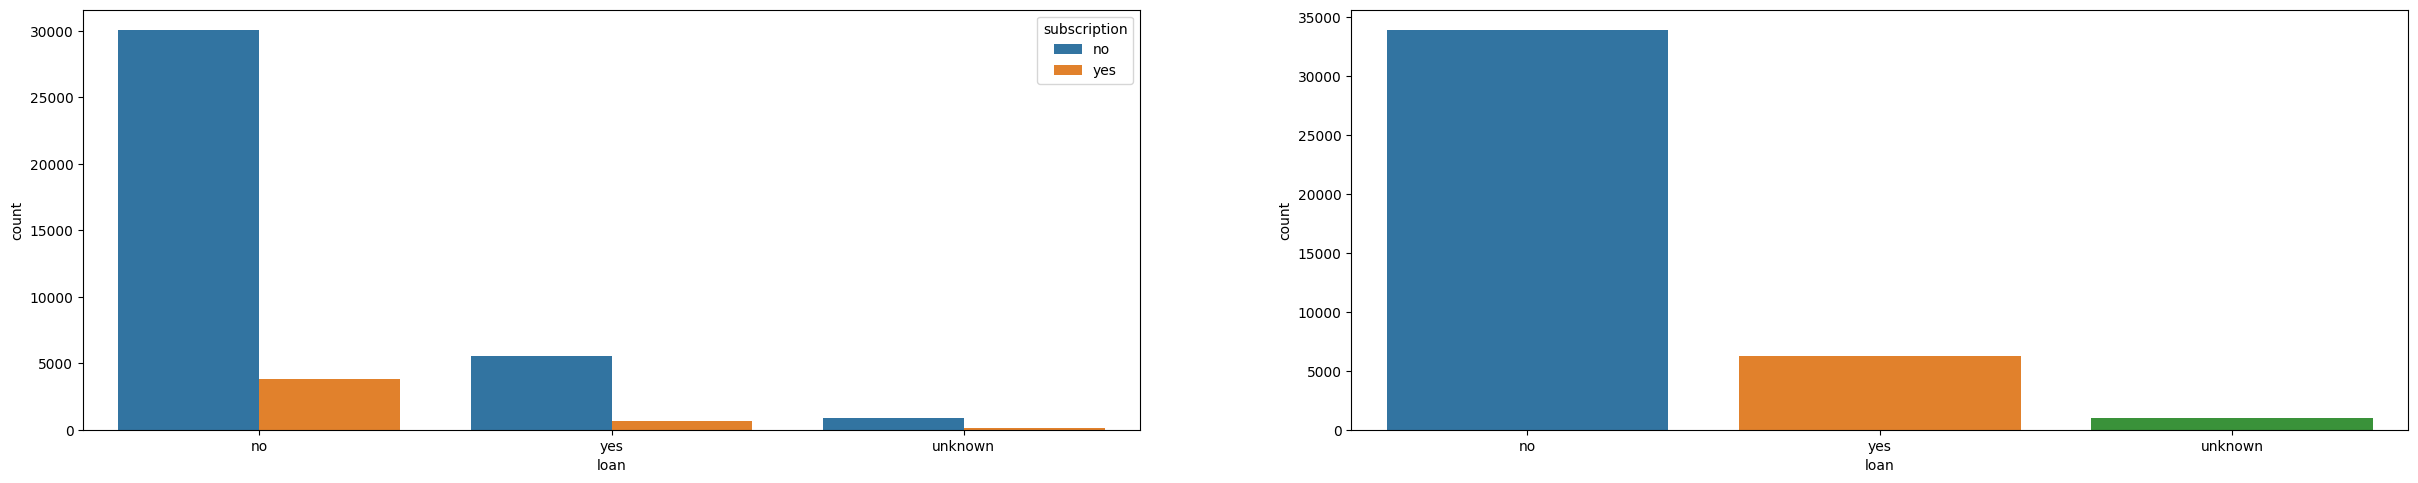

In [24]:
# unique values in loan  variable
print(df.loan.nunique())
print(df.loan .unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='loan',hue = 'subscription', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='loan', data = df)

2
['telephone' 'cellular']


<AxesSubplot: xlabel='contact', ylabel='count'>

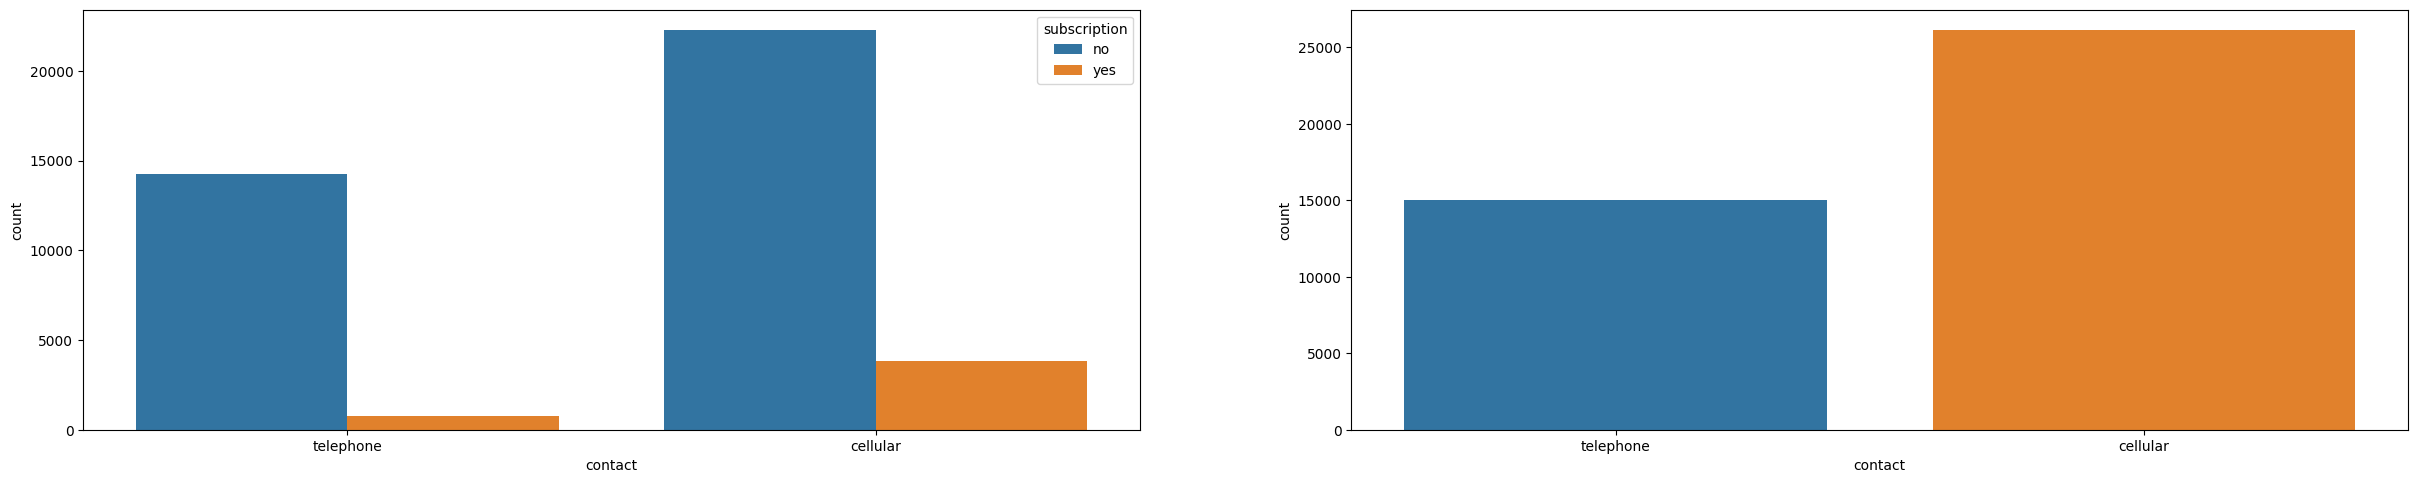

In [25]:
# unique values in contact  variable
print(df.contact.nunique())
print(df.contact.unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='contact',hue = 'subscription', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='contact', data = df)

10
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


<AxesSubplot: xlabel='month', ylabel='count'>

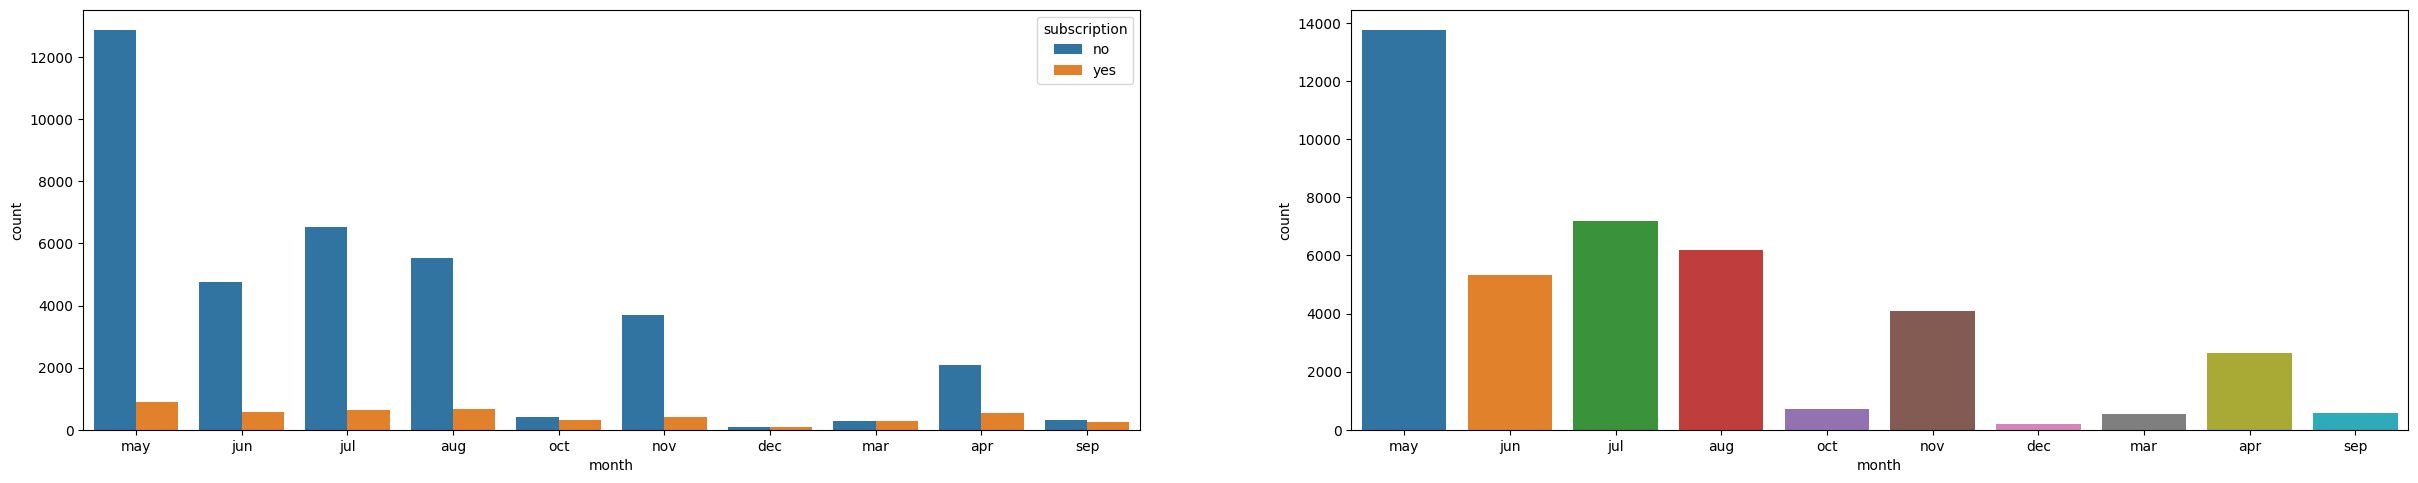

In [26]:
# unique values in month  variable
print(df.month.nunique())
print(df.month.unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='month',hue = 'subscription', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='month', data = df)
     

3
['nonexistent' 'failure' 'success']


<AxesSubplot: xlabel='poutcome', ylabel='count'>

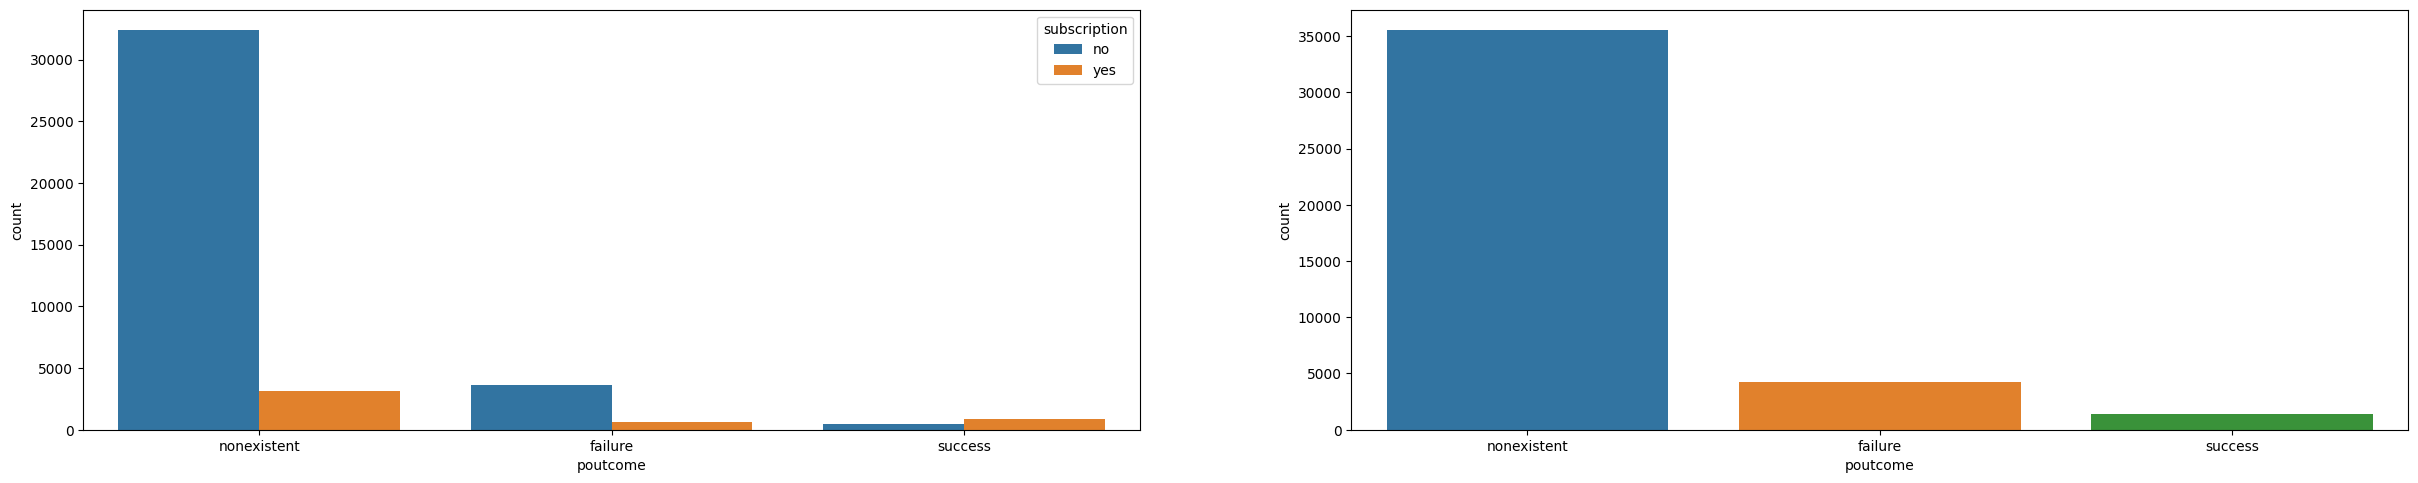

In [27]:
# unique values in poutcome  variable
print(df.poutcome.nunique())
print(df.poutcome.unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='poutcome',hue = 'subscription', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='poutcome', data = df)

8
[0 1 2 3 4 5 6 7]


<AxesSubplot: xlabel='previous', ylabel='count'>

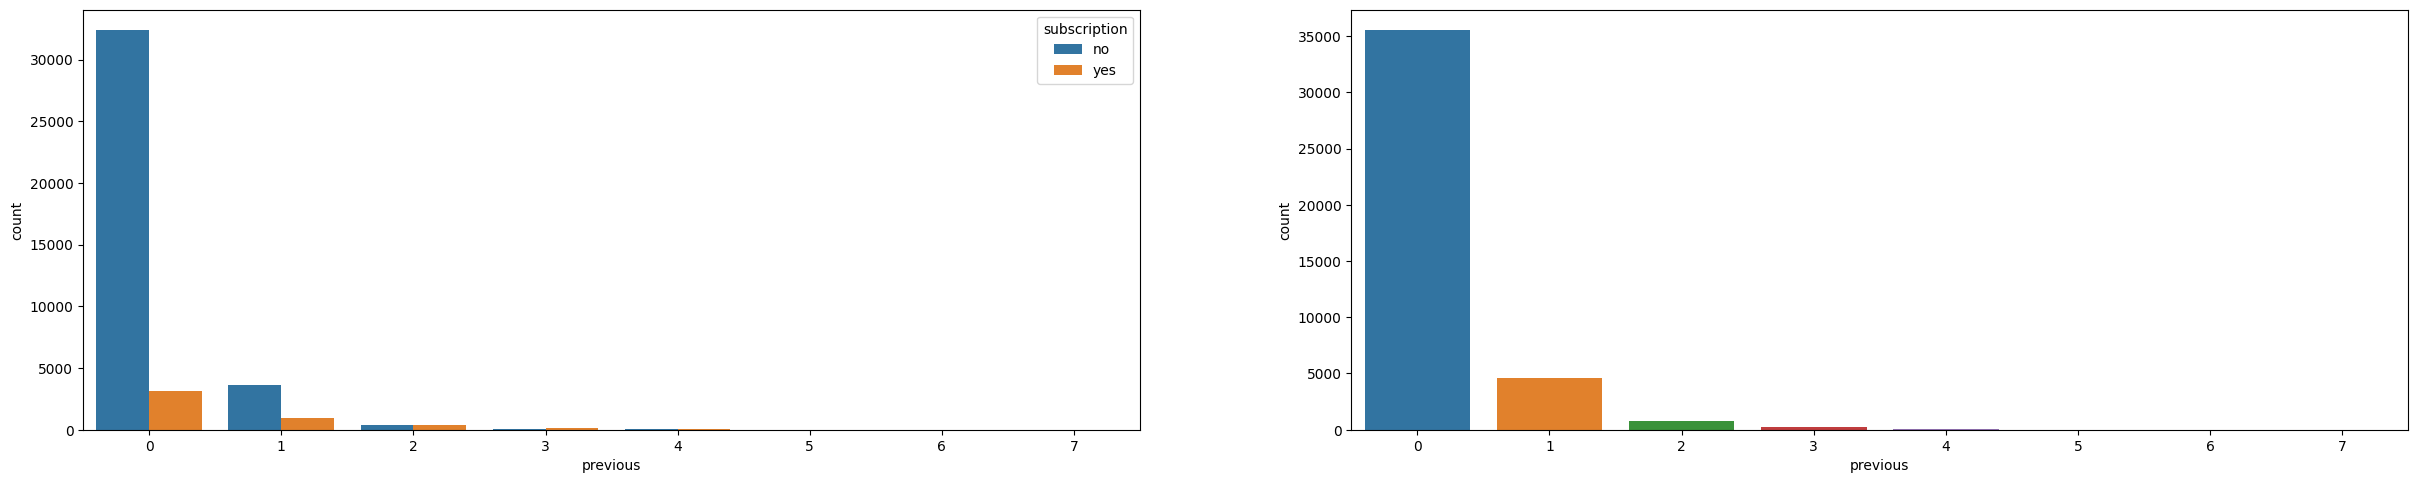

In [28]:
# unique values in previous  variable
print(df.previous.nunique())
print(df.previous.unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='previous',hue = 'subscription', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='previous', data = df)

27
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


<AxesSubplot: xlabel='pdays', ylabel='count'>

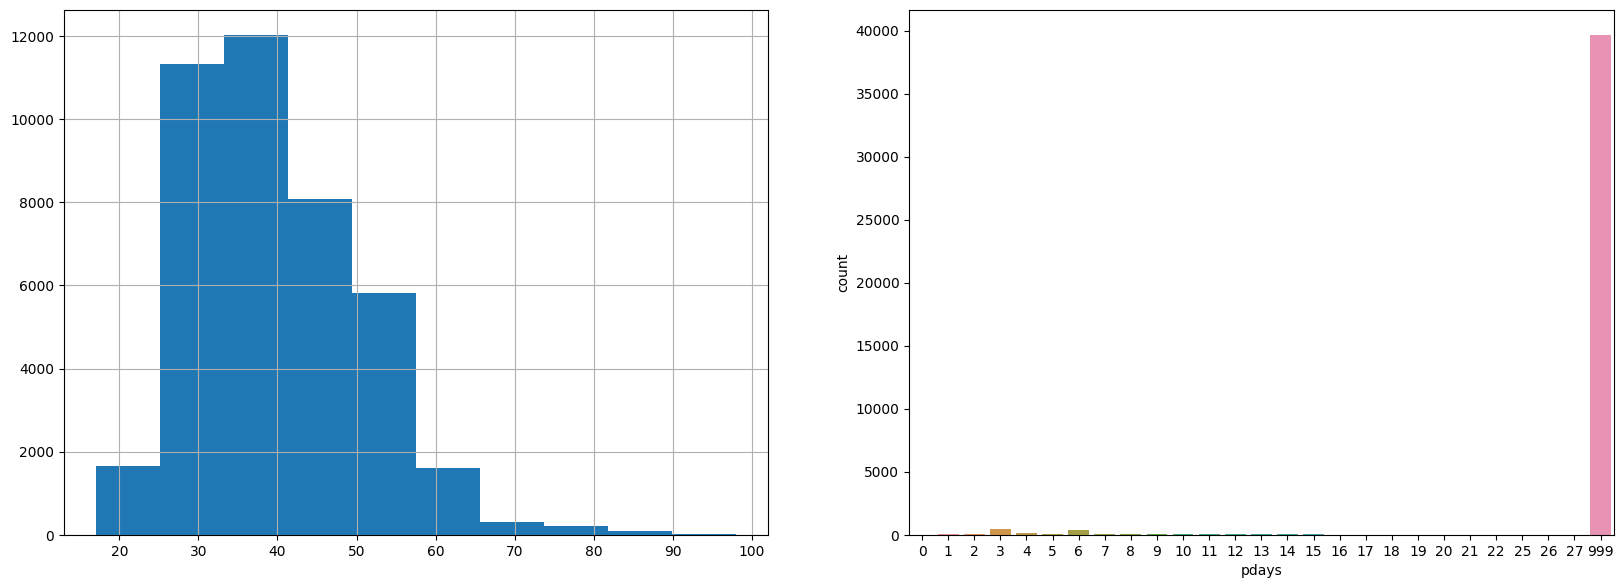

In [29]:

# unique values in pdays and age  variable
print(df.pdays.nunique())
print(df.pdays.unique())

plt.subplot(2,2,1)
df.age.hist(bins=10, figsize=(20,15))
plt.subplot(2,2,2)
sns.countplot(x ='pdays', data = df)

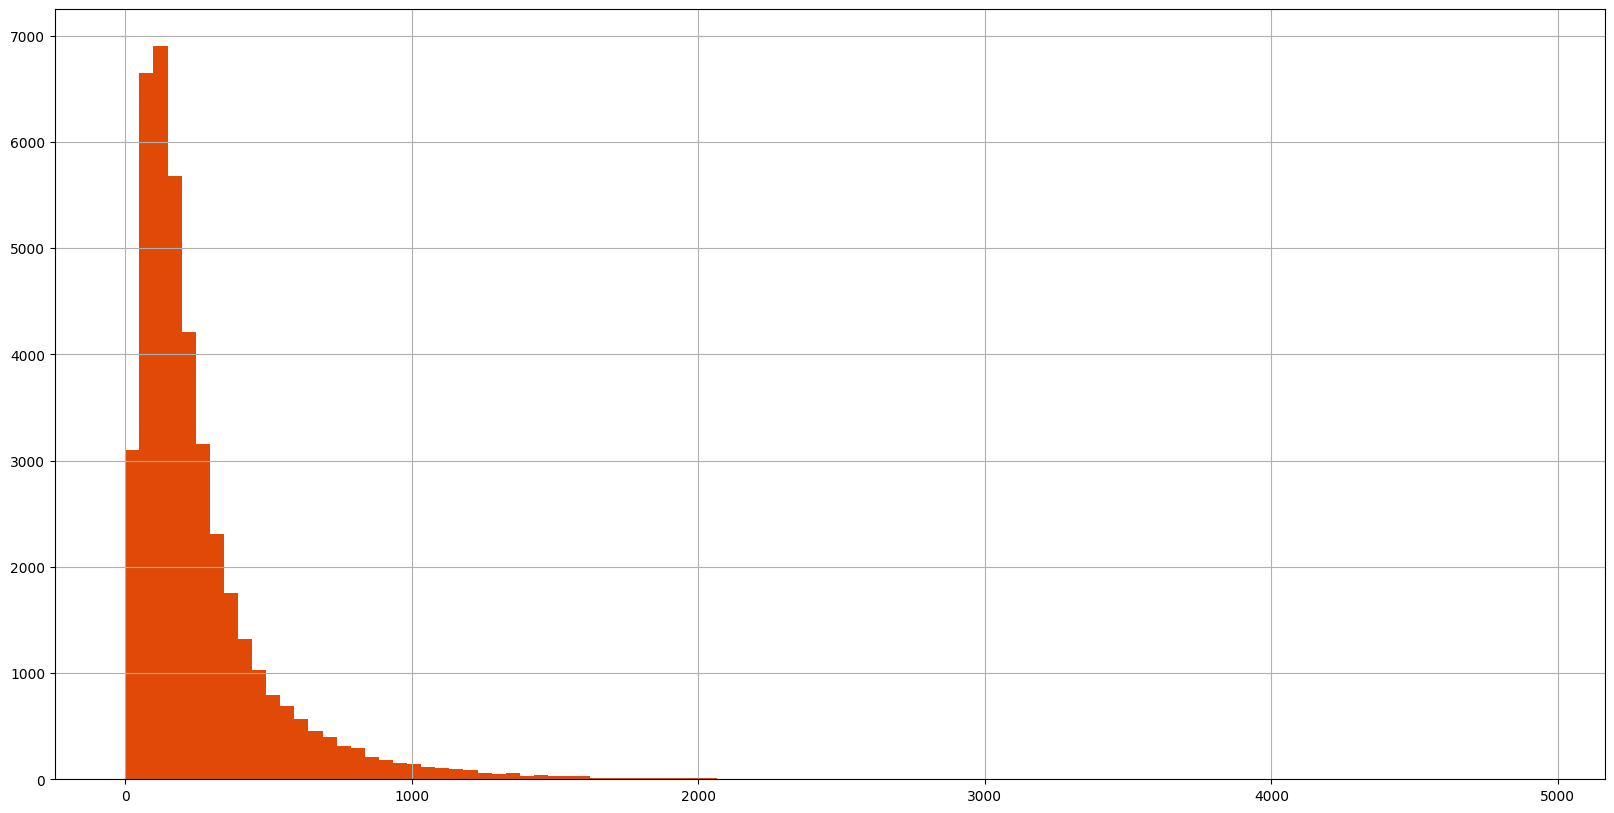

In [30]:
#Note - convert to minutes
df.duration.hist(bins=100, figsize=(20,10), color='#E14906')
plt.show()
     

In [31]:

df.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

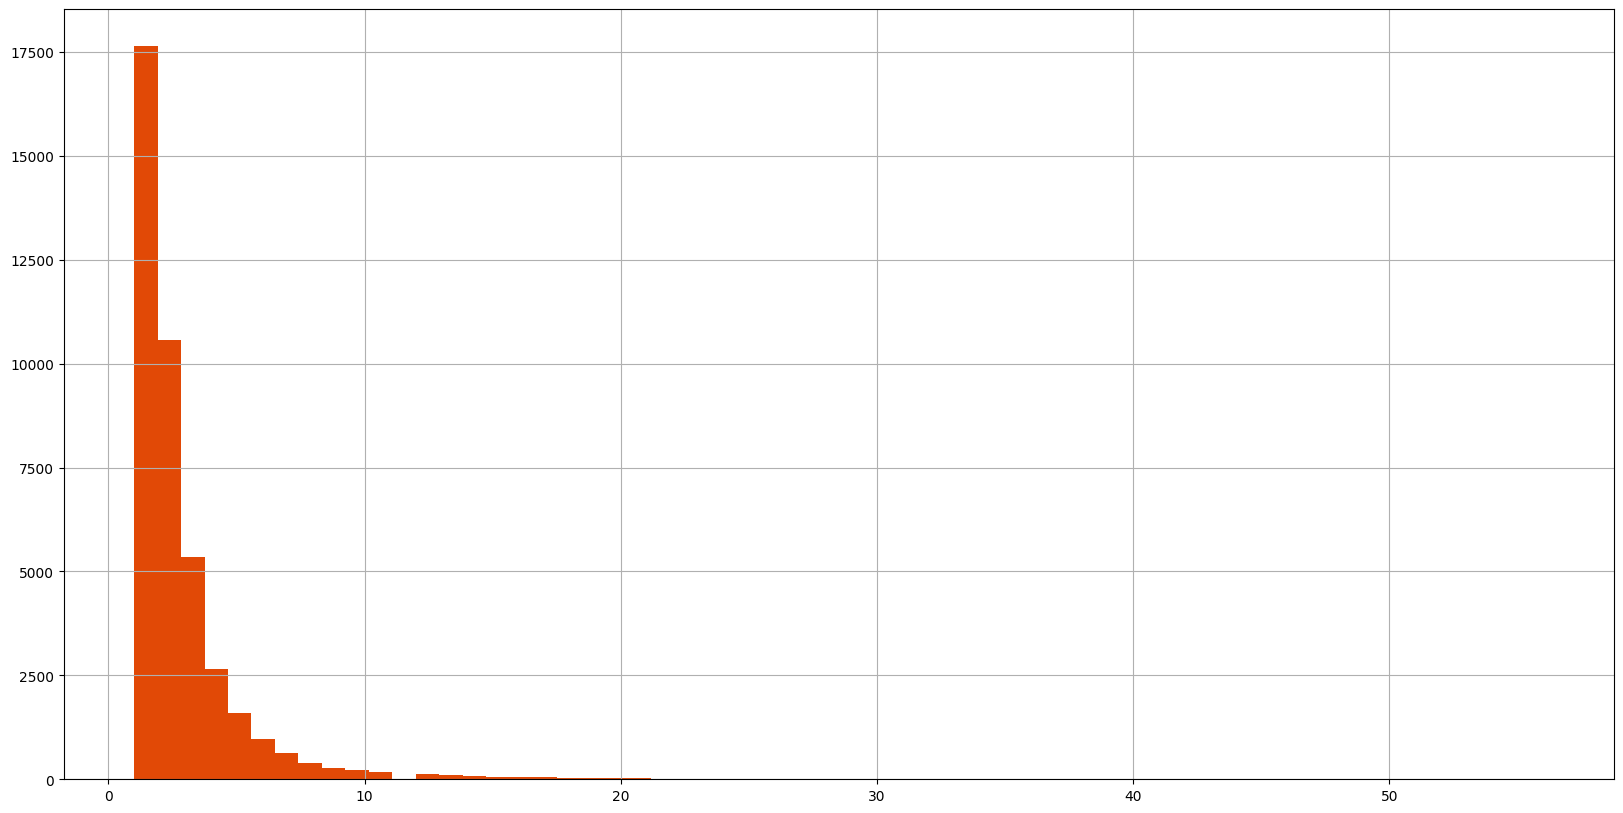

In [32]:

df.campaign.hist(bins=60, figsize=(20,10), color='#E14906')
plt.show()
     

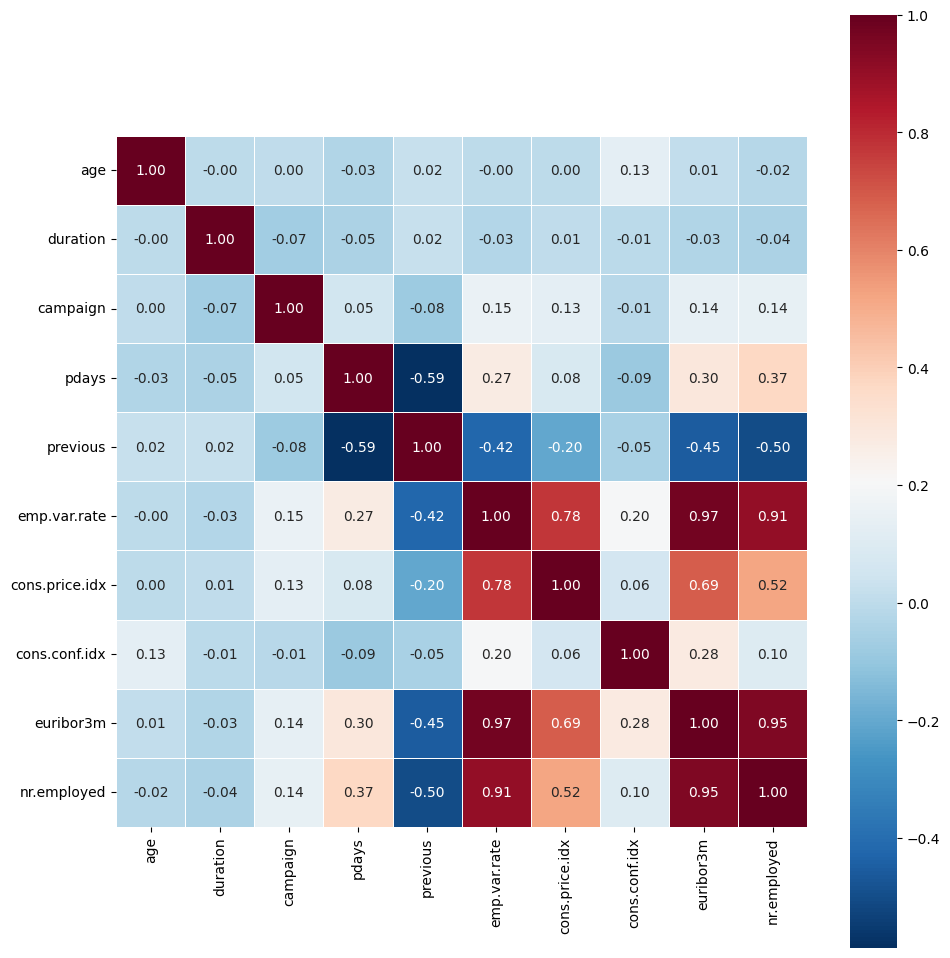

In [33]:
# Visualize feature correlations
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()


In [34]:
df.drop(['default','day_of_week'],axis=1, inplace=True)

In [35]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)
     


In [36]:
bool_columns = ['housing', 'loan', 'subscription']
for col in  bool_columns:
    df[col+'_new']=df[col].apply(lambda x : 1 if x == 'yes' else 0)
    df.drop(col, axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [38]:
X = df.drop(['subscription_new'],axis=1)
y = df['subscription_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [39]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
acc1 = accuracy_score(pred1, y_test)
print(classification_report(pred1, y_test))
print(acc1)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11479
           1       0.42      0.66      0.51       878

    accuracy                           0.91     12357
   macro avg       0.69      0.79      0.73     12357
weighted avg       0.93      0.91      0.92     12357

0.9101723719349356


In [40]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
acc2 = accuracy_score(pred2, y_test)
print(classification_report(pred2, y_test))
print(acc2)
     

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11228
           1       0.50      0.61      0.55      1129

    accuracy                           0.91     12357
   macro avg       0.73      0.77      0.75     12357
weighted avg       0.92      0.91      0.91     12357

0.9079873755765963


In [41]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
acc3 = accuracy_score(pred3, y_test)
print(classification_report(pred3, y_test))
print(acc3)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     11344
           1       0.47      0.65      0.55      1013

    accuracy                           0.91     12357
   macro avg       0.72      0.79      0.75     12357
weighted avg       0.93      0.91      0.92     12357

0.9120336651290767


C:\Users\dalve\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


roc_auc_score is:  0.7204439193714117


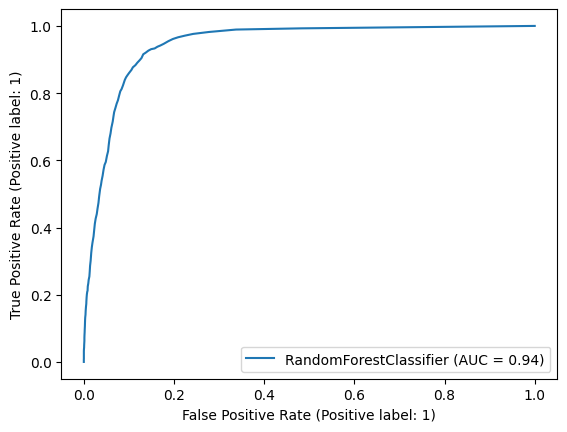

In [42]:
metrics.plot_roc_curve(model3, X_test, y_test)
print('roc_auc_score is: ', roc_auc_score(y_test, pred3))

In [43]:
model4= DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
acc4 = accuracy_score(pred4, y_test)
print(classification_report(pred4, y_test))
print(acc4)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11275
           1       0.50      0.64      0.56      1082

    accuracy                           0.91     12357
   macro avg       0.73      0.79      0.76     12357
weighted avg       0.92      0.91      0.92     12357

0.9124382940843246


In [44]:
acc_table = pd.DataFrame({'Model': ['Logistic Regression',
                                   'KNN',
                                   'Decision Tree',
                                   'Random Forest Tree'],
                         'Accuracy Score': [acc1,
                                           acc2,
                                           acc3,
                                           acc4
                                           ]})
acc_table = acc_table.sort_values(by='Accuracy Score', ascending=False)
acc_table

,Model,Accuracy Score
3,Random Forest Tree,0.912438
2,Decision Tree,0.912034
0,Logistic Regression,0.910172
1,KNN,0.907987


In [45]:
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(random_state=1)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [46]:
y_train_sm.value_counts()

0    25579
1    25579
Name: subscription_new, dtype: int64

In [47]:
sam_model1 = LogisticRegression()
sam_model1.fit(X_train_sm, y_train_sm)
sam_pred1 = sam_model1.predict(X_test)
sam_acc1 = accuracy_score(sam_pred1, y_test)
print(classification_report(sam_pred1, y_test))
print(sam_acc1)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      9870
           1       0.83      0.46      0.59      2487

    accuracy                           0.87     12357
   macro avg       0.85      0.72      0.76     12357
weighted avg       0.87      0.87      0.86     12357

0.8718944727684713


C:\Users\dalve\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
sam_model2 = KNeighborsClassifier()
sam_model2.fit(X_train_sm, y_train_sm)
sam_pred2 = sam_model2.predict(X_test)
sam_acc2 = accuracy_score(sam_pred2, y_test)
print(classification_report(sam_pred2, y_test))
print(sam_acc2)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9745
           1       0.80      0.43      0.56      2612

    accuracy                           0.86     12357
   macro avg       0.83      0.70      0.74     12357
weighted avg       0.85      0.86      0.84     12357

0.8567613498421947


In [50]:
sam_model3 = RandomForestClassifier()
sam_model3.fit(X_train_sm, y_train_sm)
sam_pred3 = sam_model3.predict(X_test)
sam_acc3 = accuracy_score(sam_pred3, y_test)
print(classification_report(sam_pred3, y_test))
print(sam_acc3)
     

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11030
           1       0.57      0.60      0.58      1327

    accuracy                           0.91     12357
   macro avg       0.76      0.77      0.77     12357
weighted avg       0.91      0.91      0.91     12357

0.9081492271586955


In [51]:
sam_model4= DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
sam_model4.fit(X_train_sm, y_train_sm)
sam_pred4 = sam_model4.predict(X_test)
sam_acc4 = accuracy_score(sam_pred4, y_test)
print(classification_report(sam_pred4, y_test))
print(sam_acc4)


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10320
           1       0.75      0.51      0.61      2037

    accuracy                           0.89     12357
   macro avg       0.83      0.74      0.77     12357
weighted avg       0.88      0.89      0.88     12357

0.8911548110382779
